<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-Welch's-t-test" data-toc-modified-id="Bayesian-estimation-equivalent-of-Welch's-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of Welch's t-test</a></span><ul class="toc-item"><li><span><a href="#The-classic-Welch's-t-test" data-toc-modified-id="The-classic-Welch's-t-test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic Welch's t-test</a></span></li></ul></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Exploraory-data-analysis-and-visualisation" data-toc-modified-id="Exploraory-data-analysis-and-visualisation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploraory data analysis and visualisation</a></span></li></ul></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{i}-&amp;\sim-Normal(\mu_{i},-\sigma_{k}-)-
\\-\mu_{i}-&amp;=\alpha_k
\\-\alpha_k-&amp;\sim-HalfNormal(0,-2.5)-\hspace{0.2cm}-for-\hspace{0.2cm}-1...k
\\-\sigma_{k}-&amp;\sim-Exponential(1)-\hspace{0.2cm}for-\hspace{0.5cm}k\hspace{0.2cm}-1...k
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{i}-&amp;\sim-Normal(\mu_{i},-\sigma_{k}-)-
\\-\mu_{i}-&amp;=\alpha_k
\\-\alpha_k-&amp;\sim-HalfNormal(0,-2.5)-\hspace{0.2cm}-for-\hspace{0.2cm}-1...k
\\-\sigma_{k}-&amp;\sim-Exponential(1)-\hspace{0.2cm}for-\hspace{0.5cm}k\hspace{0.2cm}-1...k
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <script type="math/tex; mode=display" id="MathJax-Element-921">\begin{align*}
y_{i} &\sim Normal(\mu_{i}, \sigma_{k} ) 
\\ \mu_{i} &=\alpha_k
\\ \alpha_k &\sim HalfNormal(0, 2.5) \hspace{0.2cm} for \hspace{0.2cm} 1...k
\\ \sigma_{k} &\sim Exponential(1) \hspace{0.2cm}for \hspace{0.5cm}k\hspace{0.2cm} 1...k
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Step-4---Use-Bayes-rule" data-toc-modified-id="Step-4---Use-Bayes-rule-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 4 - Use Bayes rule</a></span><ul class="toc-item"><li><span><a href="#Stan-model-of-Bayesian-Welch's-t-test" data-toc-modified-id="Stan-model-of-Bayesian-Welch's-t-test-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Stan model of Bayesian Welch's t-test</a></span></li></ul></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-one-sample-Z-test" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-one-sample-Z-test-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian one sample Z-test</a></span><ul class="toc-item"><li><span><a href="#Posterior-plots" data-toc-modified-id="Posterior-plots-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Posterior plots</a></span><ul class="toc-item"><li><span><a href="#Differnces-in-sigma" data-toc-modified-id="Differnces-in-sigma-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Differnces in sigma</a></span></li></ul></li><li><span><a href="#Autocorrelation-plots" data-toc-modified-id="Autocorrelation-plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Autocorrelation plots</a></span></li><li><span><a href="#MCMC-traceplots" data-toc-modified-id="MCMC-traceplots-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>MCMC traceplots</a></span></li><li><span><a href="#Posterior-predictive-checks" data-toc-modified-id="Posterior-predictive-checks-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Posterior predictive checks</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [4]:
# Import analysis packages
%matplotlib inline
import pystan as ps
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as ss

In [5]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of Welch's t-test

## The classic Welch's t-test

In order to understand the Welch's t-test from classical statistics it is important to first outline the student t-test (apologise to any readers who have already read the Bayesian estimation of between subkects t-test notebook but this is essentially all repetition).

The student t-test in formula form can be denoted as $$\large t = \frac{m_1-m_2}{\sqrt{\frac{S^2}{n_1}+\frac{S^2}{n_2}}}$$

$m_1 m_2 =$ the mean values for the two respective groups.

$n_1 n_2 =$ the sample size for the two respective groups.

and $S^2$ estimator for the varaince of the two groups being analysed 

$$\large S^2 = \frac{\sum(x-m_1)^2 + \sum(x-m_2)^2}{n_1 + n_2 -2}$$

with the denominator $n_1 + n_2-2$ being gthe calculation of degree of freedom for the test.

One of the assumptions of the student t-test results then from this aplication of a pooled estimator. That assumption being the homogeneity of variance (homoscedasticity).

Like all assumptions then the big question is for any analysis is are they reasonable within the application at hand. in recent years there has been arguements that the student t-test is inappropiate for research where variance between the two groups is unlikely (such as psychology/behavioural analysis), with even arguements that researchers should default to welch's t-test (Delacre, Lakens, & Leys, 2017), the impotance of a need to for default comes clearer with identifcation the prolific use of t-tests within psychology (Wetzels, et al. 2011) considering the variety of statistical tools avaible to researchers.

Nevertheless, the welch's t-test is different from the student t-test because it can analyse two groups of data within classical statitics framework even in cases of heteroscedasticity.

The Welch's t-test in formula form can be denoted as $$\large t = \frac{m_1-m_2}{\sqrt{\frac{S_{1}^{2}}{n_1}+\frac{S_{2}^{2}}{n_2}}}$$

$S_{1}^{2} S_{2}^{2}=$ Standard deviation of the the respective two groups

The df are calculated as  $\large df = $

# Bayesian inference
<font size = "3"> Following the quick description of the classic welch's t-test above its important to keep in mind that  inference within Bayesian data analysis is all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to the Welch's t-test, it is fundamentally different, because it uses fully probabilistic modelling and, therefore, any resulting infernces are not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If scientific research publication is the goal, the priors must be acceptable to a skeptical audience of peer reviewers. Much of this can be achieved using prior predictive checks to acsertain if the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interpret the posterior for any statisitcal inferences.

5. Conduct model checks. i.e. Posterior predcitive checks, to identify if the model is reasonable and therfore also check if the infernces are reasonable in addition. </font> 


#  Step 1 - Identify the relevant data for question under investigation

## Data overview and study description

The data analysed below have been downloaded from https://drive.google.com/file/d/0Bz-rhZ21ShvOdW1wV0pmUTJSSk0/view. The orignal dataset is from a study conducted by Schroeder and Epley (2015). These researchers investigated whether the chance of employment would differ based on if indivduals verbally described there skills in the form of a little speech, or if that speech was in written form and the potenitial employer read the speech instead. The researchers predicted that tone and pitch avaible to spoken word would convey more information of intellect than the written words.

To test this 39 recruiters from fortune 500 compamnies were randomly assigned to one of two conditions. These teo condtions were audio and transcript conditons. More specifically the recruiters assigned to the audio condition the recruiters listend to an aufio recording of the pitch, whereas in the transcript condition the recruiters read the same speech that the audio condition heard. Post hearing or reading of the pitch the recruiters produced rating on the candidate's: intelligence, competence, and thoughtfulness. These scores where then averaged to give an overall intellect score. With high scores relating to a higher intellect rating by the recruiters.


In [47]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/Schroeder%20and%20Epley%202015.csv"

#Generare apndas data frame with the study data
df = pd.read_csv(url)
df.head(6)

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1
5,0,3,3,3,2,2,6,2,24,2,...,6,4.666667,5.577778,5.777778,-2.666667,-2.577778,-2.777778,2.000000,2.000000,1


The two elements crucial to identify here from the dataframe is the condition column where the condition 0 is the transcript condition and condition 1 is the audio condition and the avearged intellect rating score.

## Exploraory data analysis and visualisation

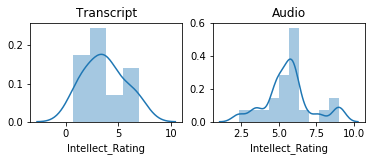

In [16]:
plt.subplot(2,2,1)
sns.distplot( df[df['CONDITION'] == 0]['Intellect_Rating'] ).set_title('Transcript');
plt.subplot(2,2,2)
sns.distplot( df[df['CONDITION'] == 1]['Intellect_Rating'] ).set_title('Audio');

What a visual inspection of histograms at least show for the sample at least is that there might be a differnce in the variability of the indepedent conditions and thus the data may be a candidate for welch's t-test under the classical statiscal framework. In the case of Bayesian model applied below our assumption of of heteroscedasticity will be baked into out model in our attempy to model the data generating process, and in the case of recruiters ratings by audio or transcript a differnce in the variability of ratings data of two indepednt conditions is reasonable.

# Step 2 - Define the descriptive statistical model \begin{align*}
y_{i} &\sim Normal(\mu_{i}, \sigma_{k} ) 
\\ \mu_{i} &=\alpha_k
\\ \alpha_k &\sim HalfNormal(0, 2.5) \hspace{0.2cm} for \hspace{0.2cm} 1...k
\\ \sigma_{k} &\sim Exponential(1) \hspace{0.2cm}for \hspace{0.5cm}k\hspace{0.2cm} 1...k
\end{align*} 

<font size = "3">The formulation for presenting statistical models here follows that used by McElreath (2020) for its intuitive nature. In plain english the model specifies that the dependent variable $y_{ik}$ of the raters Averaged intellect rating for the two independent groups are distributed normally in terms of the Likelihood an unkown $\mu_k$ that is to be estimated with a halfnormal prior probability distribution on $\mu$ that has a $\mu = 0$ and $ \sigma = 2.5$. </font>

# Step 3 - Specifying priors

# Step 4 - Use Bayes rule

## Stan model of Bayesian Welch's t-test

In [83]:
Welch_t_model = """

data{

int<lower = 1> N; // number of data points
vector[N] y; // vector of data points in long format for both groups
int K; // number of groups
int<lower = 1, upper = K> x[N]; // array of interger values of the indicator variable for groups
int<lower = 0, upper = 1> onlyprior;
}

parameters{

// Model parameters to be estimated

 vector<lower = 0>[K] mu; //
 vector<lower = 0>[K] sigma; //Standard deviation bounded at 0
 
}

model{

//priors
mu ~ normal(5,2.5);
sigma ~ exponential(1);

// Conditional statement whether to run prior predictive check or 
// full analysis
if (!onlyprior)
// Likliehood
y ~ normal(mu[x], sigma[x]);

}

generated quantities{
real diff = mu[1] - mu[2];
real Cohen_D = diff / (sigma[1] + sigma[2])/2;


real yrep[N];
  
// Generate data for posterior samples

    yrep = normal_rng(mu[x], sigma[x]);
 
}
"""

In [84]:
# StanModel function can be called and be passed the model string specified above to compile into C++ code.
sm  = ps.StanModel(model_code = Welch_t_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bbb570752a79c1164a9a269da373b93d NOW.


In [88]:
df["CONDITION"].replace({0: 2}, inplace=True)
data = {'N': len(df),
        'y': df["Intellect_Rating"].values,
        'K': 2,
        'x': df["CONDITION"],
        # 0 means run with the likelihood
        'onlyprior': 0}

In [89]:
fit = sm.sampling(data = data, iter = 2000 , warmup = 1000, seed = 1)

In [90]:
# Because of python print statement a large number of model outputs do not scale and pRICULAR outputs cannot be selected,
# so it is easier to put outputs into a pandas dataframe.
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns=summary['summary_colnames'], 
                  index=summary['summary_rownames'])

#Output model results.
fit_df.head(5)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu[1],5.618700,0.006683,0.362199,4.917676,5.384587,5.620976,5.855956,6.322648,2937.129538,1.000619
mu[2],3.690425,0.006969,0.448471,2.825289,3.399440,3.684823,3.981845,4.574824,4141.160204,1.000209
sigma[1],1.645802,0.004767,0.267493,1.224244,1.456036,1.609903,1.794466,2.257812,3148.183287,0.999418
sigma[2],1.936335,0.005693,0.331820,1.401017,1.700735,1.888935,2.128100,2.719820,3397.404652,1.000622
diff,1.928275,0.009899,0.571131,0.793414,1.551105,1.935104,2.311861,3.066420,3328.884731,1.000240


# Post model fit-visualisations - Bayesian one sample Z-test
The arviz package offers many useful functions for plotting MCMC samples of the posteriors produced by Bayesian data analysis with Stan.

## Posterior plots

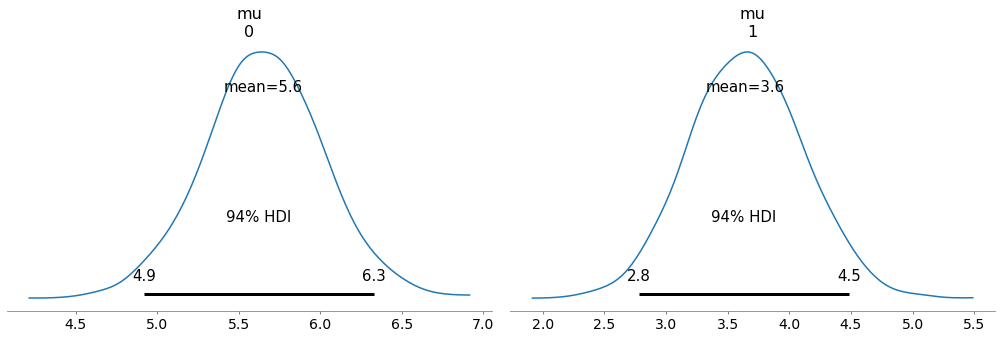

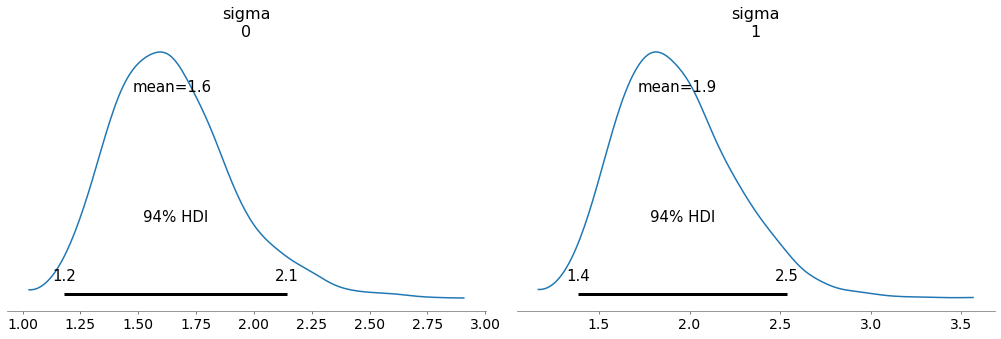

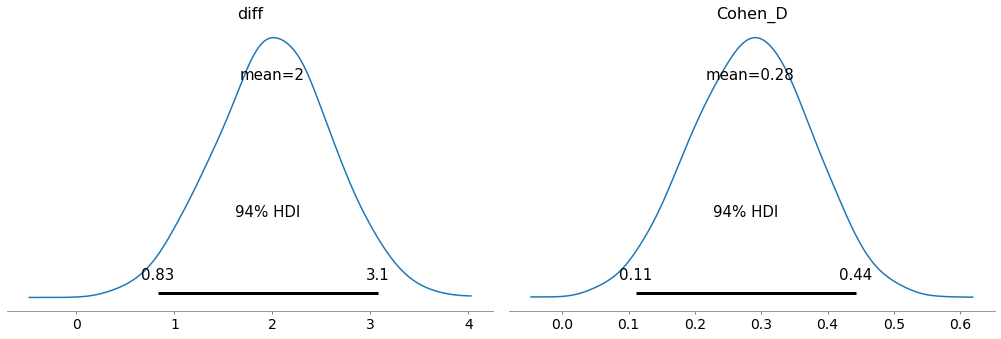

In [78]:
# Using the arviz package the posteriors can be plotted from the MCMC samples
az.plot_posterior(fit, var_names=("mu"));
az.plot_posterior(fit, var_names=("sigma"));
az.plot_posterior(fit, var_names=("diff",
                                  "Cohen_D"));

### Differnces in sigma
Of crucial evaluation here is the individually estimated sigma terms for the independent groups. Which

## Autocorrelation plots

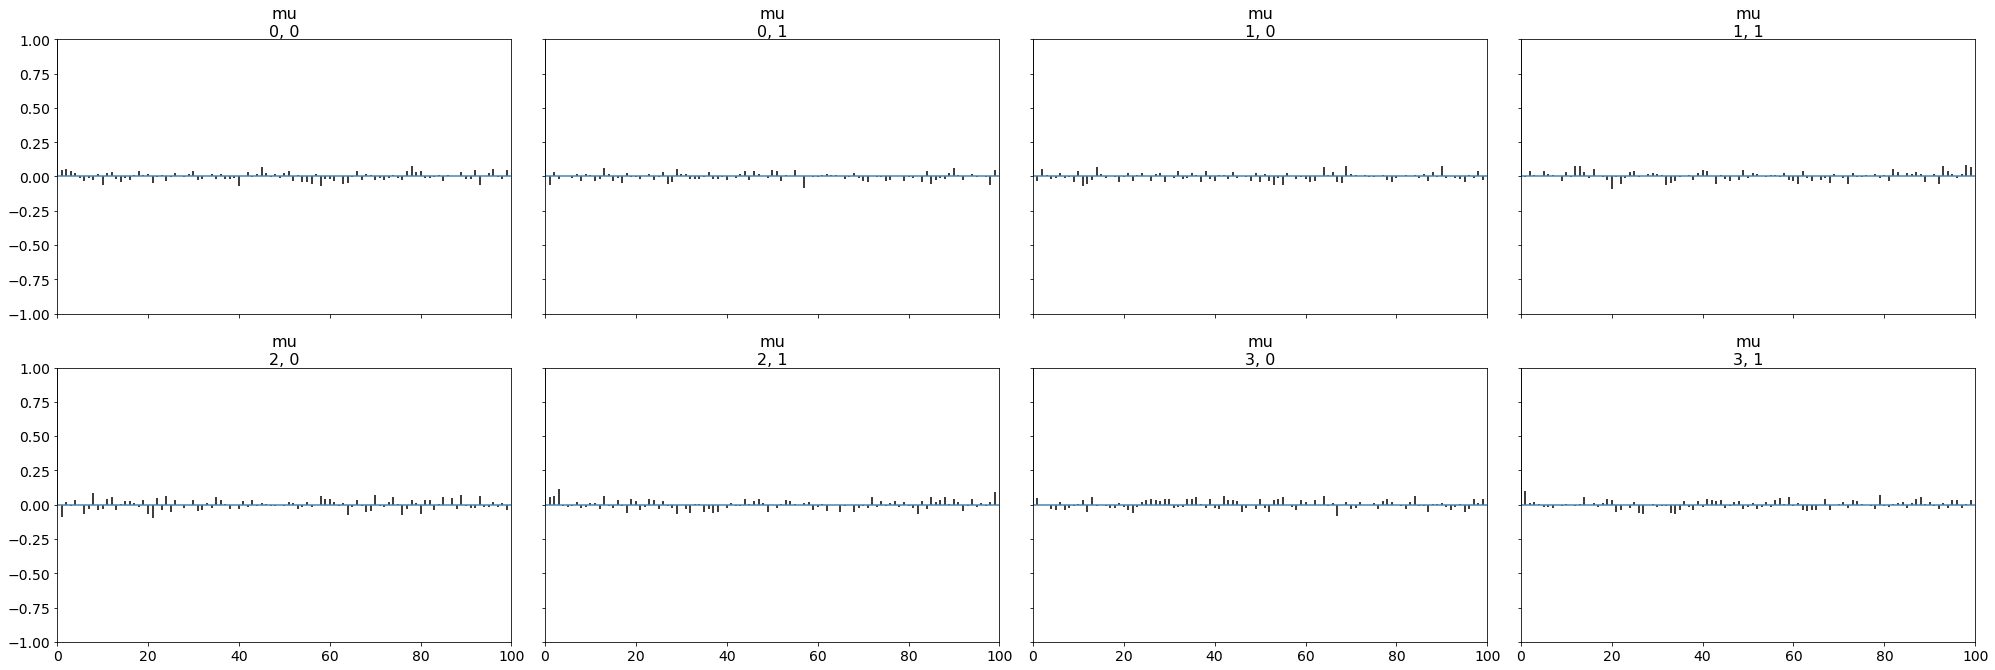

In [80]:
# Using the arviz package the autocorrelation of the 4 MCMC chains can be plotted.
az.plot_autocorr(fit, var_names=("mu"));

##  MCMC traceplots

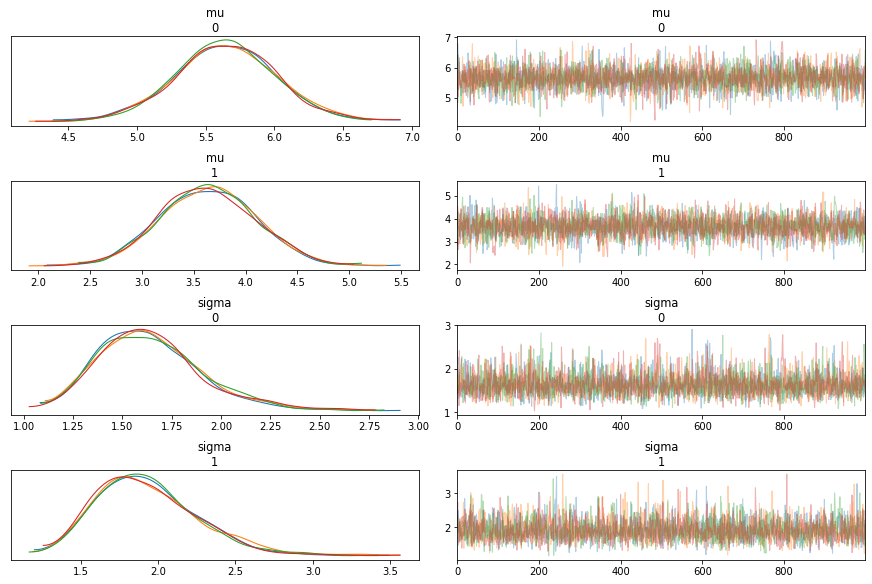

In [81]:
# Using the arviz package the traceplots of the 4 MCMC chains can be plotted.
az.plot_trace(fit, var_names=("mu", "sigma"));

## Posterior predictive checks

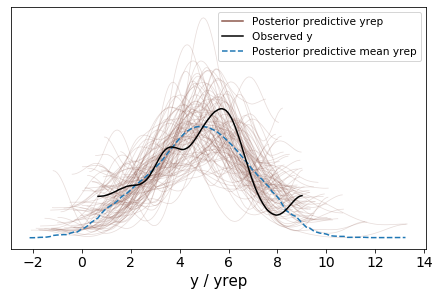

In [91]:
# Convert the pystan object into Arviz inference object for use in plotting functions
data = az.from_pystan(
                posterior=fit,
                posterior_predictive='yrep',
                observed_data=["y"])
                
az.plot_ppc(data, data_pairs = {"y" : "yrep"}, num_pp_samples= 100);

The posterir predcitive checks shows variation in generted data from model when compared observed data, this may suggest need for more modelling but at the same time may simple reflect an example of small sammple size from a niche population of fortune 500 recruiters

# References
Delacre, M., Lakens, D., & Leys, C. (2017). Why psychologists should by default use Welch’s t-test instead of Student’s t-test. International Review of Social Psychology, 30(1).

Schroeder, J., & Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a
job candidate’s appeal. Psychological Science, 26, 877-891.

Wetzels, R., Matzke, D., Lee, M. D., Rouder, J. N., Iverson, G. J., & Wagenmakers, E. J. (2011). Statistical evidence in experimental psychology: An empirical comparison using 855 t tests. Perspectives on Psychological Science, 6(3), 291-298.